<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Statistical_Thinking_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Thinking in Python

Exercises from DataCamp
solved by me



In [ ]:
import pandas as pd

#Importing csv file from DataCamp asssets
url = "https://assets.datacamp.com/production/repositories/469/datasets/8fb59b9a99957c3b9b1c82b623aea54d8ccbcd9f/2008_all_states.csv"
df = pd.read_csv(url) #Loading csv file from url into Pandas DataFrame

print(df.head())

  state                                       county  ...  dem_share  east_west
0    AK    State House District 8, Denali-University  ...      50.06       west
1    AK  State House District 37, Bristol Bay-Aleuti  ...      41.24       west
2    AK  State House District 12, Richardson-Glenn H  ...      25.93       west
3    AK      State House District 13, Greater Palmer  ...      24.93       west
4    AK     State House District 14, Greater Wasilla  ...      20.82       west

[5 rows x 8 columns]


## Graphical Exploratory Data Analysis

about exploring newly loaded dataset, plotting data to analyze it visually - used:
* Histogram
* Swarm Plot
* EDCF



In [ ]:
#Using Iris dataset
from sklearn.datasets import load_iris
import numpy as np
data = load_iris() 
print(type(data))

<class 'sklearn.utils.Bunch'>


**Plotting a histogram of iris data**
*Import matplotlib.pyplot and seaborn as their usual aliases (plt and sns).
* Use seaborn to set the plotting defaults.
* Plot a histogram of the Iris versicolor petal lengths using plt.hist() and the provided NumPy array versicolor_petal_length.
* Show the histogram using plt.show().

```
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

```

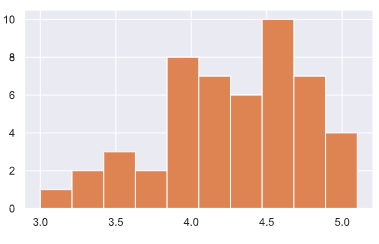

**Labeling the axes**

* Label the axes. Don't forget that you should always include units in your axis labels. Your -axis label is just 'count'. Your -axis label is 'petal length (cm)'. The units are essential!
* Display the plot constructed in the above steps using plt.show().

```
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.ylabel('count')
_ = plt.xlabel('petal length (cm)')


# Show histogram

plt.show()
```
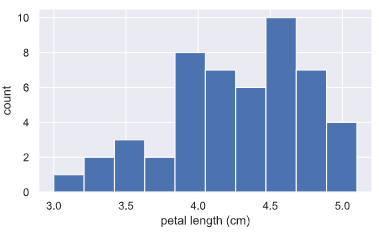

**Adjusting the number of bins in a histogram**

```
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram

plt.hist(versicolor_petal_length, bins=n_bins)
# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()
```

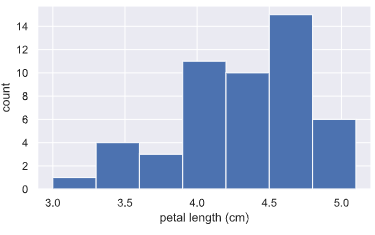

### Plot all of your data: Bee swarm plots

**Swarm plot**

```
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
plt.ylabel('petal length (cm)')
plt.xlabel('species')

# Show the plot

plt.show()
```

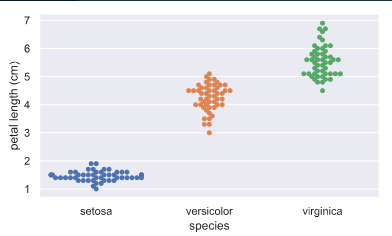

### Plot all of your data: ECDFs

**Computing the ECDF**

Define an EDF function:
* Define a function with the signature ecdf(data). Within the function definition,
* Compute the number of data points, n, using the len() function.
* The -values are the sorted data. Use the np.sort() function to perform the sorting.
* The  data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange(). Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. Be sure to divide this by n.
* The function returns the values x and y.

In [ ]:
import numpy as np
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


**Plotting the ECDF** 

```
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
plt.xlabel('versicolor_petal_length')
plt.ylabel('ECDF')


# Display the plot
plt.show()
```

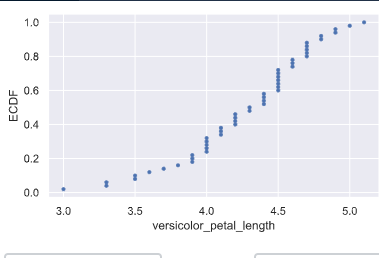

**Comparison of ECDFs**

```
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ =plt.plot(x_set, y_set, marker='.', linestyle='none')
_ =plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ =plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()
```

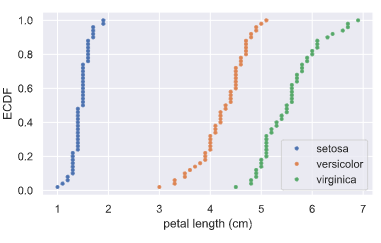

## Quantitative Exploratory Data Analysis

simple summary statistics

**Computing means**

```
# Compute the mean: mean_length_vers
mean_length_vers= np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')
```

### Percentiles, outliers, boxplots

**Computing percentiles**

* Create percentiles, a NumPy array of percentiles you want to compute. These are the 2.5th, 25th, 50th, 75th, and 97.5th. You can do so by creating a list containing these ints/floats and convert the list to a NumPy array using np.array(). For example, np.array([30, 50]) would create an array consisting of the 30th and 50th percentiles.
* Use np.percentile() to compute the percentiles of the petal lengths from the Iris versicolor samples. The variable versicolor_petal_length is in your namespace.
* Print the percentiles.

```
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)
```

**Comparing percentiles to ECDF**

```
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot

plt.show()
```

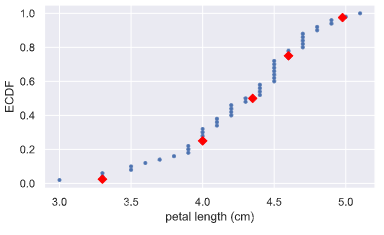


**Box-and-whisker plot**

```
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()
```

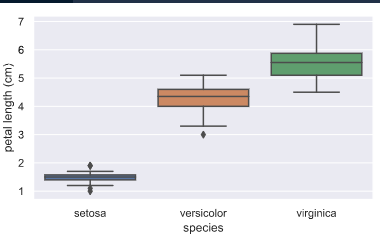

### Variance and standard deviation

**Computing the variance**

* Create an array called differences that is the difference between the petal lengths (versicolor_petal_length) and the mean petal length. The variable versicolor_petal_length is already in your namespace as a NumPy array so you can take advantage of NumPy's vectorized operations.
* Square each element in this array. For example, x**2 squares each element in the array x. Store the result as diff_sq.
* Compute the mean of the elements in diff_sq using np.mean(). Store the result as variance_explicit.
* Compute the variance of versicolor_petal_length using np.var(). Store the result as variance_np.
* Print both variance_explicit and variance_np in one print call to make sure they are consistent.

```
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit)
print(variance_np)
```

```
0.21640000000000004
0.21640000000000004
```

**The standard deviation and the variance**

* Compute the variance of the data in the versicolor_petal_length array using np.var() and store it in a variable called variance.

* Print the square root of this value.

* Print the standard deviation of the data in the versicolor_petal_length array using np.std().

```
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))
```

```
<script.py> output:
    0.4651881339845203
    0.4651881339845203
```




### Covariance and the Pearson correlation coefficient

```
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
_ = plt.xlabel('versicolor_petal_length')

_ = plt.ylabel('versicolor_petal_width')


# Show the result
plt.show()
```

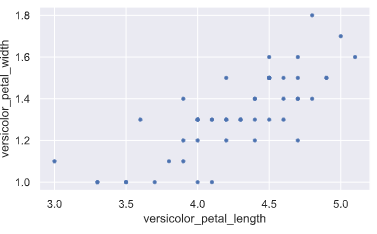

**Computing the covariance**

* Use np.cov() to compute the covariance matrix for the petal length (versicolor_petal_length) and width (versicolor_petal_width) of I. versicolor.
* Print the covariance matrix.
* Extract the covariance from entry [0,1] of the covariance matrix. Note that by symmetry, entry [1,0] is the same as entry [0,1].
* Print the covariance.

```
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)
```
**Computing the Pearson correlation coefficient**

* Define a function with signature pearson_r(x, y).
  * Use np.corrcoef() to compute the correlation matrix of x and y (pass them to np.corrcoef() in that order).
  * The function returns entry [0,1] of the correlation matrix.
* Compute the Pearson correlation between the data in the arrays versicolor_petal_length and versicolor_petal_width. Assign the result to r.
* Print the result.

```

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)


    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r= pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)
```


## Thinking Probabilistically-- Discrete Variables

###Random number generators and hacker statistics

**Generating random numbers using the np.random module**

* Seed the random number generator using the seed 42.
* Initialize an empty array, random_numbers, of 100,000 entries to store the random numbers. Make sure you use np.empty(100000) to do this.
* Write a for loop to draw 100,000 random numbers using np.random.random(), storing them in the random_numbers array. To do so, loop over range(100000).
* Plot a histogram of random_numbers. It is not necessary to label the axes in this case because we are just checking the random number generator. 

```
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

```

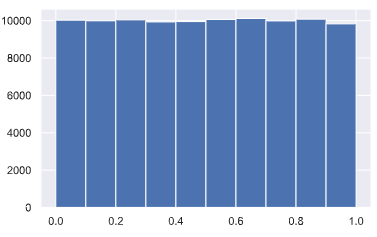

**The np.random module and Bernoulli trials**

* Define a function with signature perform_bernoulli_trials(n, p).
  * Initialize to zero a variable n_success the counter of Trues, which are Bernoulli trial successes.
  * Write a for loop where you perform a Bernoulli trial in each iteration and increment the number of success if the result is True. Perform n iterations by looping over range(n).
    * To perform a Bernoulli trial, choose a random number between zero and one using np.random.random(). If the number you chose is less than p, increment n_success (use the += 1 operator to achieve this).
* The function returns the number of successes n_success.

```
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()


        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success
```
**How many defaults might we expect?**

* Seed the random number generator to 42.
* Initialize n_defaults, an empty array, using np.empty(). It should contain 1000 entries, since we are doing 1000 simulations.
* Write a for loop with 1000 iterations to compute the number of defaults per 100 loans using the perform_bernoulli_trials() function. It accepts two arguments: the number of trials n - in this case 100 - and the probability of success p - in this case the probability of a default, which is 0.05. On each iteration of the loop store the result in an entry of n_defaults.
* Plot a histogram of n_defaults. Include the normed=True keyword argument so that the height of the bars of the histogram indicate the probability.

```
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()
```
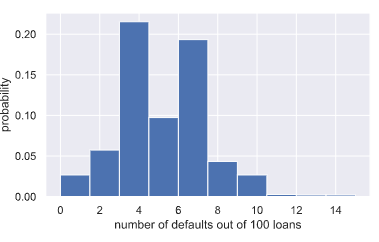

**Will the bank fail?**

* Compute the x and y values for the ECDF of n_defaults.
* Plot the ECDF, making sure to label the axes. Remember to include marker = '.' and linestyle = 'none' in addition to x and y in your call plt.plot().
* Show the plot.
* Compute the total number of entries in your n_defaults array that were greater than or equal to 10. To do so, compute a boolean array that tells you whether a given entry of n_defaults is >= 10. Then sum all the entries in this array using np.sum(). For example, np.sum(n_defaults <= 5) would compute the number of defaults with 5 or fewer defaults.
* The probability that the bank loses money is the fraction of n_defaults that are greater than or equal to 10.

```
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('label_x')
plt.ylabel('ECDF')


# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money= np.sum(n_defaults >=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))
```

```
<script.py> output:
    Probability of losing money = 0.022
```

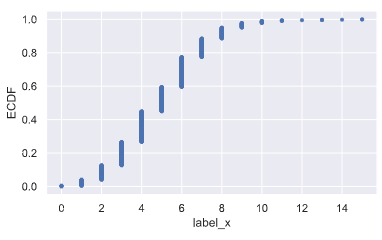


### Probability distributions and stories: The Binomial distribution

**Sampling out of the Binomial distribution**

* Draw samples out of the Binomial distribution using np.random.binomial(). You should use parameters n = 100 and p = 0.05, and set the size keyword argument to 10000.
* Compute the CDF using your previously-written ecdf() function.
* Plot the CDF with axis labels. The x-axis here is the number of defaults out of 100 loans, while the y-axis is the CDF.

```
# Take 10,000 samples out of the binomial distribution: n_defaults

n_defaults = np.random.binomial(100, 0.05, 10000)
# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('n_defaults out of 100 loans')
plt.ylabel('CDF')

# Show the plot
plt.show()
```

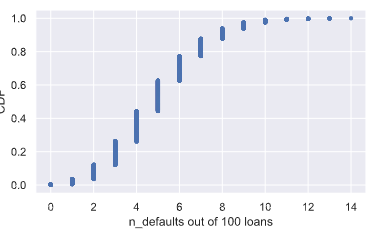

**Plotting the Binomial PMF**

* Using np.arange(), compute the bin edges such that the bins are centered on the integers. Store the resulting array in the variable bins.
* Use plt.hist() to plot the histogram of n_defaults with the normed=True and bins=bins keyword arguments.

```
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, bins=bins, normed=True)

# Label axes
plt.xlabel('n_defaults')
plt.ylabel('Binomial distribution')

# Show the plot
plt.show()
```

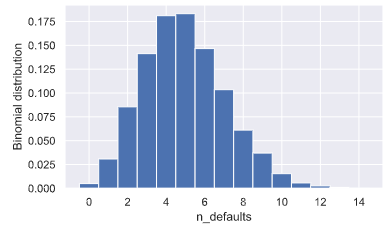

### Poisson processes and the Poisson distribution

**Relationship between Binomial and Poisson distributions**

* Using the np.random.poisson() function, draw 10000 samples from a Poisson distribution with a mean of 10.
* Make a list of the n and p values to consider for the Binomial distribution.  Choose n = [20, 100, 1000] and p = [0.5, 0.1, 0.01] so that  is always 10.
* Using np.random.binomial() inside the provided for loop, draw 10000 samples from a Binomial distribution with each n, p pair and print the mean and standard deviation of the samples. There are 3 n, p pairs: 20, 0.5, 100, 0.1, and 1000, 0.01. These can be accessed inside the loop as n[i], p[i].

```
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n, p= [[20,100,1000],[0.5, 0.1, 0.01]]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))
```

```
<script.py> output:
    Poisson:      10.0186 3.144813832327758
    n = 20 Binom: 9.9637 2.2163443572694206
    n = 100 Binom: 9.9947 3.0135812433050484
    n = 1000 Binom: 9.9985 3.139378561116833
```

**What is the probability? with poisson distribution**

* Draw 10000 samples from a Poisson distribution with a mean of 251/115 and assign to n_nohitters.
* Determine how many of your samples had a result greater than or equal to 7 and assign to n_large.
* Compute the probability, p_large, of having 7 or more no-hitters by dividing n_large by the total number of samples (10000).

```
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)
```

```
<script.py> output:
    Probability of seven or more no-hitters: 0.0067
```



## Thinking Probabilistically-- Continuous Variables

**The Normal PDF**

* Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. Do the same for Normal distributions with standard deviations of 3 and 10, each still with a mean of 20. Assign the results to samples_std1, samples_std3 and samples_std10, respectively.
* Plot a histograms of each of the samples; for each, use 100 bins, also using the keyword arguments normed=True and histtype='step'. The latter keyword argument makes the plot look much like the smooth theoretical PDF. You will need to make 3 plt.hist() calls.

```
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms

plt.hist(samples_std1, histtype='step', normed=True, bins=100)
plt.hist(samples_std3, histtype='step', normed=True, bins=100)
plt.hist(samples_std10, histtype='step', normed=True, bins=100)
# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()
```
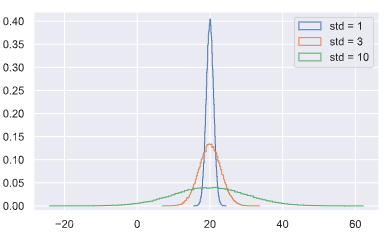


**The Normal CDF**

* Use your ecdf() function to generate x and y values for CDFs: x_std1, y_std1, x_std3, y_std3 and x_std10, y_std10, respectively.
* Plot all three CDFs as dots (do not forget the marker and linestyle keyword arguments!).

```

# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 =ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')
# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()
```

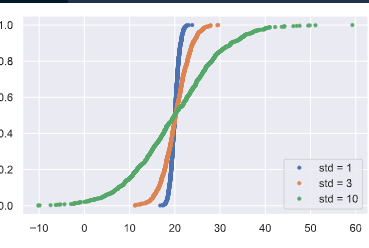

### The Normal distribution: Properties and warnings

**Are these close to Normally distributed?**

* Compute mean and standard deviation of Belmont winners' times with the two outliers removed. The NumPy array belmont_no_outliers has these data.
* Take 10,000 samples out of a normal distribution with this mean and standard deviation using np.random.normal().
* Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.

```
# Compute mean and standard deviation: mu, sigma
mu, sigma = np.mean(belmont_no_outliers), np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x,y = ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()
```

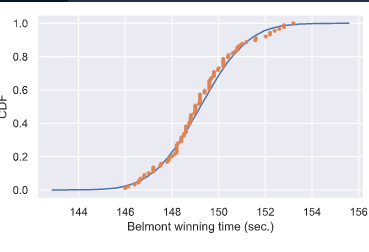


**What is the probability of beating some records?**

* Take 1,000,000 samples from the normal distribution using the np.random.normal() function. The mean mu and standard deviation sigma are already loaded into the namespace of your IPython instance.
* Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.

```
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)
```
```
<script.py> output:
    Probability of besting Secretariat: 0.000635
```



### The Exponential distribution

**No named distribution? You can still simulate it**

* Define a function with call signature successive_poisson(tau1, tau2, size=1) that samples the waiting time for a no-hitter and a hit of the cycle.
* Draw waiting times tau1 (size number of samples) for the no-hitter out of an exponential distribution and assign to t1.
* Draw waiting times tau2 (size number of samples) for hitting the cycle out of an exponential distribution and assign to t2.
* The function returns the sum of the waiting times for the two events.

```
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=1)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=1)

    return t1 + t2
```

**Checking the cycle of exponentially distributed events**

* Use your successive_poisson() function to draw 100,000 out of the distribution of waiting times for observing a no-hitter and a hitting of the cycle.
* Plot the PDF of the waiting times using the step histogram technique of a previous exercise. Don't forget the necessary keyword arguments. You should use bins=100, normed=True, and histtype='step'.
* Label the axes.
* Show your plot.

```
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764,715, size=100000)

# Make the histogram
plt.hist(waiting_times, histtype='step', normed=True, bins=100)


# Label axes
plt.xlabel('waiting_times')
plt.ylabel('Exponential distribution')

# Show the plot
plt.show()

```

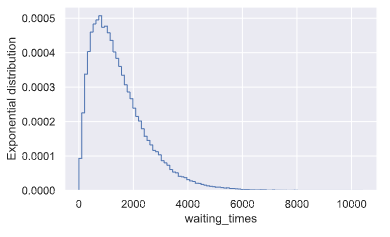

## Parameter estimation by optimization

**Optimal parameters**
Calculating and plotting exponential.

*Seed the random number generator with 42.
* Compute the mean time (in units of number of games) between no-hitters.
* Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of the inter-no-hitter times.
* Plot the theoretical PDF using plt.hist(). Remember to use keyword arguments bins=50, normed=True, and histtype='step'. Be sure to label your axes.
* Show your plot.

```
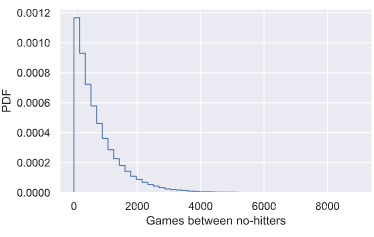


**Overlay the theoretical CDF with the ECDF from the data. Verify if the Exponential distribution describes the observed data**

* Compute an ECDF from the actual time between no-hitters (nohitter_times). Use the ecdf() function you wrote in the prequel course.
* Create a CDF from the theoretical samples you took in the last exercise (inter_nohitter_time).
* Plot x_theor and y_theor as a line using plt.plot(). Then overlay the ECDF of the real data x and y as points. To do this, you have to specify the keyword arguments marker = '.' and linestyle = 'none' in addition to x and y inside plt.plot().
* Set a 2% margin on the plot.
* Show the plot.

```
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()
```

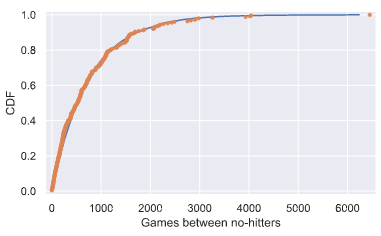

**What is an optimal parameter?**

* Take 10000 samples out of an Exponential distribution with parameter  = tau/2.
* Take 10000 samples out of an Exponential distribution with parameter  = 2*tau.
* Generate CDFs from these two sets of samples using your ecdf() function.
* Add these two CDFs as lines to your plot.

```
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()
```
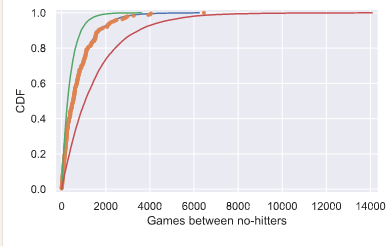

### Linear regression by least squares

**EDA with new dataset**

* Plot fertility (y-axis) versus illiteracy (x-axis) as a scatter plot.
* Set a 2% margin.
* Compute and print the Pearson correlation coefficient between illiteracy and fertility.

```
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))
```
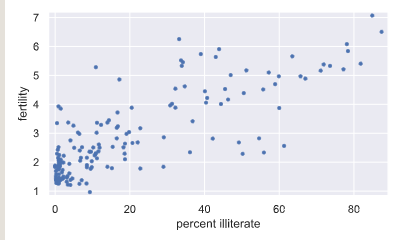

**Plotting data with a linear regression**

* Compute the slope and intercept of the regression line using np.polyfit(). Remember, fertility is on the y-axis and illiteracy on the x-axis.
* Print out the slope and intercept from the linear regression.
* To plot the best fit line, create an array x that consists of 0 and 100 using np.array(). Then, compute the theoretical values of y based on your regression parameters. I.e., y = a * x + b.
* Plot the data and the regression line on the same plot. Be sure to label your axes.

```
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()
```
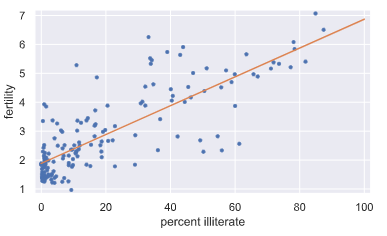

**Residual sum of squares vs. slope - what is optimal?**

* Specify the values of the slope to compute the RSS. Use np.linspace() to get 200 points in the range between 0 and 0.1. For example, to get 100 points in the range between 0 and 0.5, you could use np.linspace() like so: np.linspace(0, 0.5, 100).
* Initialize an array, rss, to contain the RSS using np.empty_like() and the array you created above. The empty_like() function returns a new array with the same shape and type as a given array (in this case, a_vals).
* Write a for loop to compute the sum of RSS of the slope. Hint: the RSS is given by np.sum((y_data - a * x_data - b)**2). The variable b you computed in the last exercise is already in your namespace. Here, fertility is the y_data and illiteracy the x_data.
* Plot the RSS (rss) versus slope (a_vals).

```
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss,  '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()
```

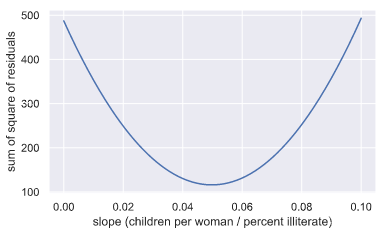

### The importance of EDA: Anscombe's quartet

**Linear regression on appropriate Anscombe data**

* Compute the parameters for the slope and intercept using np.polyfit(). The Anscombe data are stored in the arrays x and y.
* Print the slope a and intercept b.
* Generate theoretical  and  data from the linear regression. Your  array, which you can create with np.array(), should consist of 3 and 15. To generate the  data, multiply the slope by x_theor and add the intercept.
* Plot the Anscombe data as a scatter plot and then plot the theoretical line. Remember to include the marker='.' and linestyle='none' keyword arguments in addition to x and y when to plot the Anscombe data as a scatter plot. You do not need these arguments when plotting the theoretical line.

```
# Perform linear regression: a, b
a, b = np.polyfit(x,y,1)

# Print the slope and intercept
print( a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor,y_theor, marker='.', linestyle='none')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()
```
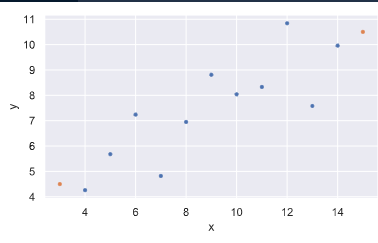

**Linear regression on all Anscombe data**

```
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)
```

```
<script.py> output:
    slope: 0.5000909090909095 intercept: 3.000090909090909
    slope: 0.5000000000000004 intercept: 3.0009090909090896
    slope: 0.4997272727272731 intercept: 3.0024545454545453
    slope: 0.4999090909090908 intercept: 3.0017272727272735
```


##Bootstrap confidence intervals

###Generating bootstrap replicates

**Visualizing bootstrap samples**

* Write a for loop to acquire 50 bootstrap samples of the rainfall data and plot their ECDF.
* Use np.random.choice() to generate a bootstrap sample from the NumPy array rainfall. Be sure that the size of the resampled array is len(rainfall).
Use the function ecdf() that you wrote in the prequel to this course to generate the x and y values for the ECDF of the bootstrap sample bs_sample.
* Plot the ECDF values. Specify color='gray' (to make gray dots) and alpha=0.1 (to make them semi-transparent, since we are overlaying so many) in addition to the marker='.' and linestyle='none' keyword arguments.
* Use ecdf() to generate x and y values for the ECDF of the original rainfall data available in the array rainfall.
* Plot the ECDF values of the original data.

```
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()
```

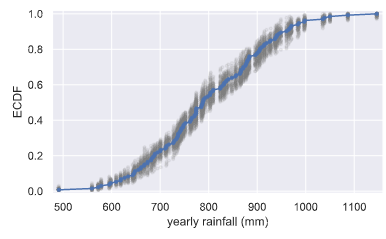



### Bootstrap confidence intervals

**Generating many bootstrap replicates**

* Define a function with call signature draw_bs_reps(data, func, size=1).
Using np.empty(), initialize an array called bs_replicates of size size to hold all of the bootstrap replicates.
* Write a for loop that ranges over size and computes a replicate using bootstrap_replicate_1d(). Refer to the exercise description above to see the function signature of bootstrap_replicate_1d(). Store the replicate in the appropriate index of bs_replicates.
* Return the array of replicates bs_replicates. This has already been done for you.

```
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
```

**Bootstrap replicates of the mean and the SEM**

* Draw 10000 bootstrap replicates of the mean annual rainfall using your draw_bs_reps() function and the rainfall array. Hint: Pass in np.mean for func to compute the mean.
  * As a reminder, draw_bs_reps() accepts 3 arguments: data, func, and size.
* Compute and print the standard error of the mean of rainfall.
The formula to compute this is np.std(data) / np.sqrt(len(data)).
* Compute and print the standard deviation of your bootstrap replicates bs_replicates.
* Make a histogram of the replicates using the normed=True keyword argument and 50 bins.

```
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()
```
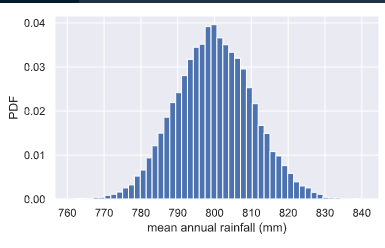

**Bootstrap replicates of other statistics**

* Draw 10000 bootstrap replicates of the variance in annual rainfall, stored in the rainfall dataset, using your draw_bs_reps() function. Hint: Pass in np.var for computing the variance.
* Divide your variance replicates (bs_replicates) by 100 to put the variance in units of square centimeters for convenience.
* Make a histogram of bs_replicates using the normed=True keyword argument and 50 bins.

```
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units f square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()
```

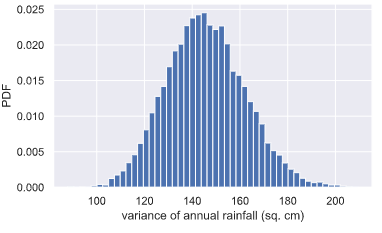

**Confidence interval of exponential distributed data**

* Generate 10000 bootstrap replicates of  from the nohitter_times data using your draw_bs_reps() function. Recall that the optimal  is calculated as the mean of the data.
* Compute the 95% confidence interval using np.percentile() and passing in two arguments: The array bs_replicates, and the list of percentiles - in this case 2.5 and 97.5.
* Print the confidence interval.
* Plot a histogram of your bootstrap replicates.

```
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()
```

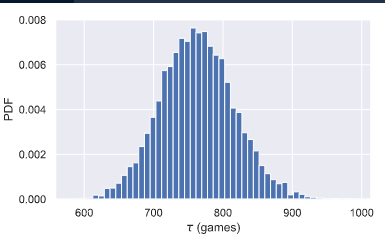

###Pairs bootstrap

**A function to do pairs bootstrap**

* Define a function with call signature draw_bs_pairs_linreg(x, y, size=1) to perform pairs bootstrap estimates on linear regression parameters.
  * Use np.arange() to set up an array of indices going from 0 to len(x). These are what you will resample and use them to pick values out of the x and y arrays.
  * Use np.empty() to initialize the slope and intercept replicate arrays to be of size size.
  * Write a for loop to:
    * Resample the indices inds. Use np.random.choice() to do this.
    * Make new  and  arrays bs_x and bs_y using the the resampled indices bs_inds. To do this, slice x and y with bs_inds.
    * Use np.polyfit() on the new  and  arrays and store the computed slope and intercept.
  * Return the pair bootstrap replicates of the slope and intercept.

```
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps
```

**Pairs bootstrap in practice, estimate of the slope, confidence interval**

* Use your draw_bs_pairs_linreg() function to take 1000 bootstrap replicates of the slope and intercept. The x-axis data is illiteracy and y-axis data is fertility.
* Compute and print the 95% bootstrap confidence interval for the slope.
* Plot and show a histogram of the slope replicates. Be sure to label your axes. 

```
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()
```

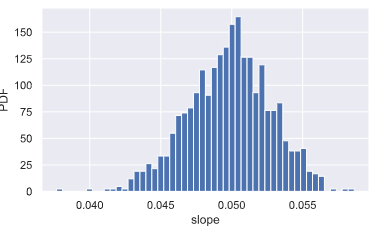




**Plotting bootstrap regressions**

* Generate an array of -values consisting of 0 and 100 for the plot of the regression lines. Use the np.array() function for this.
* Write a for loop in which you plot a regression line with a slope and intercept given by the pairs bootstrap replicates. Do this for 100 lines.
  * When plotting the regression lines in each iteration of the for loop, recall the regression equation y = a*x + b. Here, a is bs_slope_reps[i] and b is bs_intercept_reps[i].
  * Specify the keyword arguments linewidth=0.5, alpha=0.2, and color='red' in your call to plt.plot().
* Make a scatter plot with illiteracy on the x-axis and fertility on the y-axis. Remember to specify the marker='.' and linestyle='none' keyword arguments.
* Label the axes, set a 2% margin, and show the plot.

```
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility ,marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()
```
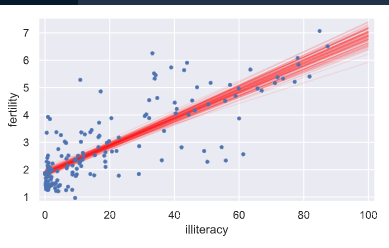

##Introduction to hypothesis testing

###Formulating and simulating a hypothesis

**Generating a permutation sample**

* Concatenate the two input arrays into one using np.concatenate(). Be sure to pass in data1 and data2 as one argument (data1, data2).
* Use np.random.permutation() to permute the concatenated array.
* Store the first len(data1) entries of permuted_data as perm_sample_1 and the last len(data2) entries of permuted_data as perm_sample_2. In practice, this can be achieved by using :len(data1) and len(data1): to slice permuted_data.
* Return perm_sample_1 and perm_sample_2.

```
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2
```

**Visualizing permutation sampling**

* Write a for loop to generate 50 permutation samples, compute their ECDFs, and plot them.
  * Generate a permutation sample pair from rain_june and rain_november using your permutation_sample() function.
  * Generate the x and y values for an ECDF for each of the two permutation samples for the ECDF using your ecdf() function.
  * Plot the ECDF of the first permutation sample (x_1 and y_1) as dots. Do the same for the second permutation sample (x_2 and y_2).
* Generate x and y values for ECDFs for the rain_june and rain_november data and plot the ECDFs using respectively the keyword arguments color='red' and color='blue'.
* Label your axes, set a 2% margin, and show your plot.

```
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()
```

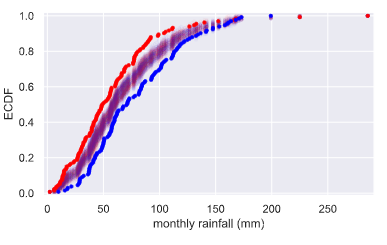

###Test statistics and p-values

**

##Hypothesis test examples